In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from torch import optim
import torch
import numpy as np

# Dataset

In [3]:
from dataset import get_pytorch_datataset, BATCH_SIZE

df_returns_real, dataset, dataloader, N_ASSETS, WINDOW_SIZE = get_pytorch_datataset()

print(f'\nDataset length: {len(dataset)}')
print(f'Number of assets: {N_ASSETS}')
sample_batch = next(iter(dataloader))
assert sample_batch.size() == (BATCH_SIZE, N_ASSETS, WINDOW_SIZE)
print(f'Sample batch: {sample_batch.size()}')

AAAAAAA data True data\tickers.csv True
Chosen tickers: ['LKOH', 'SBER', 'SBERP', 'VTBR', 'MOEX']
Length before dropping NaNs: 2603
Length after dropping NaNs: 2577

Dataset length: 2451
Number of assets: 5
Sample batch: torch.Size([256, 5, 126])


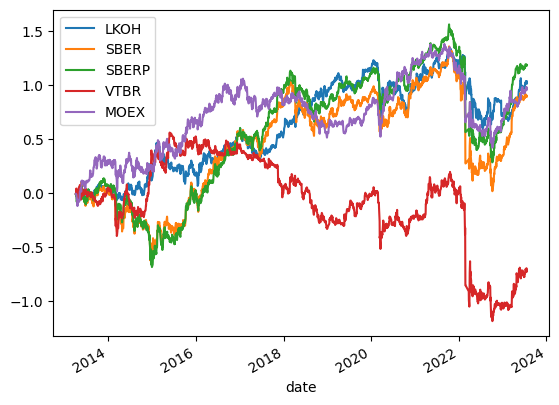

In [4]:
df_returns_real.cumsum().plot()
plt.show()

# GAN LSTN


In [5]:
from constants import DEVICE

print(f'Use device: {DEVICE}')

Use device: cpu


In [6]:
from gan_LSTM import Discriminator, Generator

assert Discriminator()(next(iter(dataloader))).size() == (BATCH_SIZE,)
# assert Generator()(Generator.get_noise(BATCH_SIZE)).size() == next(iter(dataloader)).size()

C:\Python\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


## Train

  0%|          | 0/800 [00:00<?, ?it/s]

50 epochs train time: 67.5s. Estimated train time: 16.9m
1 torch.Size([1, 5, 126])
Fake std: [0.06112807 0.06098206 0.06371575 0.06370573 0.06140239].
Real std: [0.01934618 0.02320357 0.02170969 0.02256658 0.01871406]
Fake correlation: 0.005368544076078916. Real correlation: 0.9185647795211369


C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


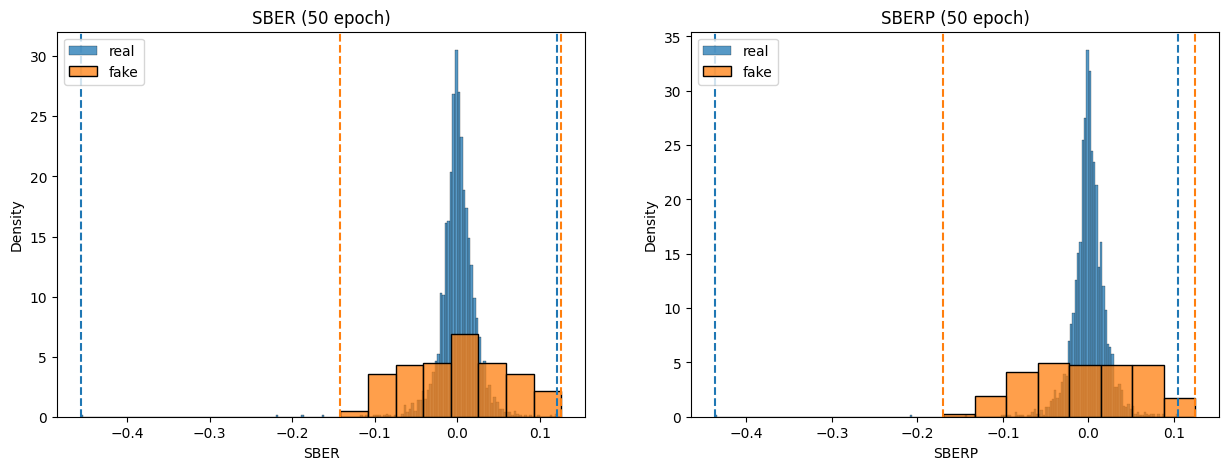

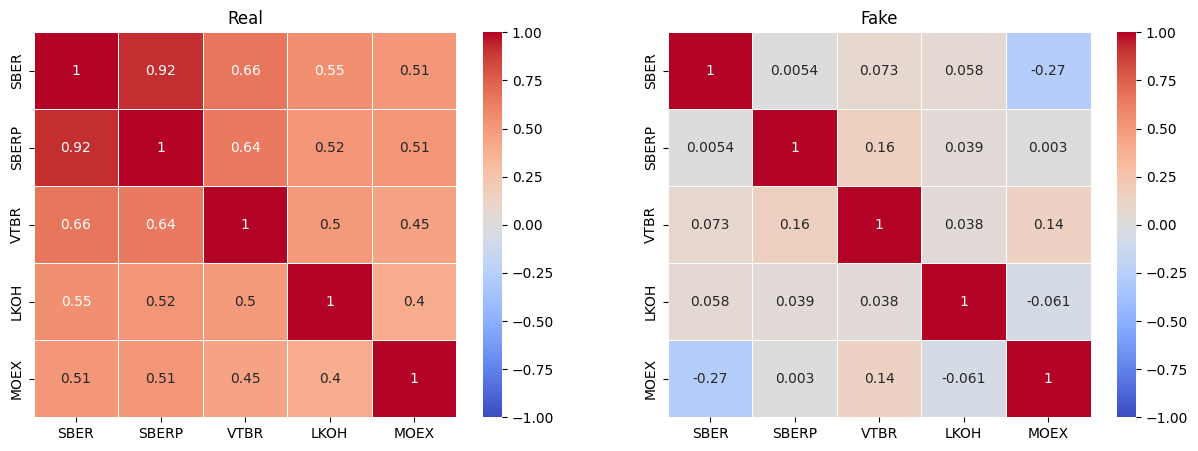

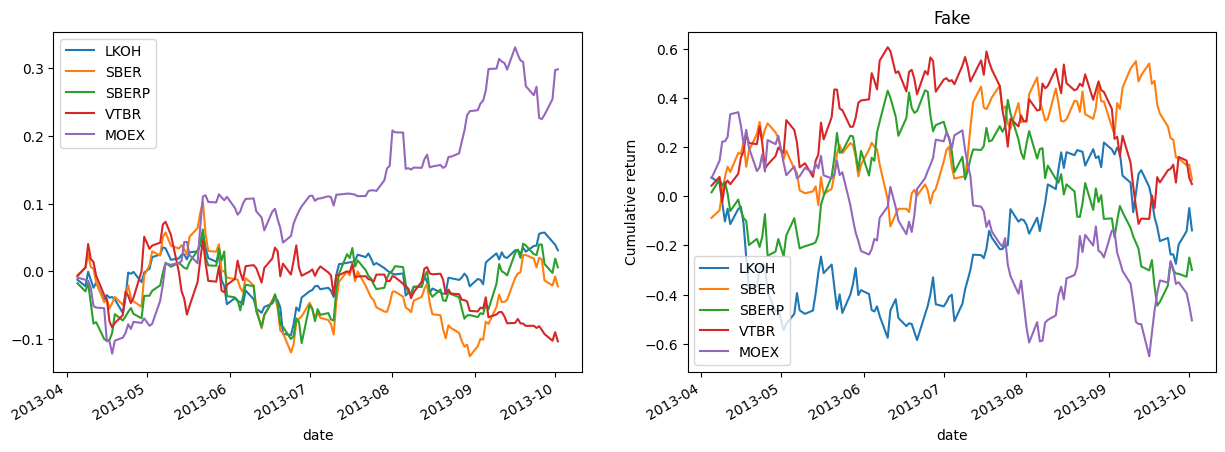

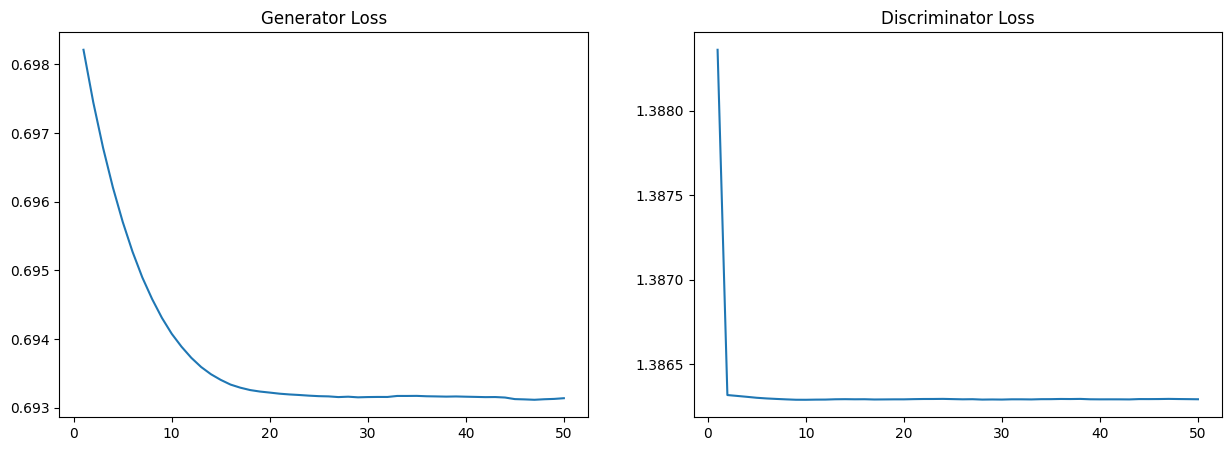

KeyboardInterrupt: 

In [35]:
from gan_train_loop_LSTM import train_gan

N_EPOCHS = 800
LOG_FREQUENCY = 50
SAVE_FREQUENCY = 200

# Define generator and discriminator
discriminator = Discriminator().to(DEVICE)
generator = Generator().to(DEVICE)

# Define the optimizers for generator and discriminator
LR = 0.0002
generator_optimizer = optim.RMSprop(generator.parameters(), lr=LR)
discriminator_optimizer = optim.RMSprop(discriminator.parameters(), lr=LR)

# Train GAN
discriminator_losses, generator_losses = train_gan(generator, discriminator, generator_optimizer, discriminator_optimizer, dataloader, df_returns_real, n_epochs=N_EPOCHS, log_frequency=LOG_FREQUENCY, save_frequency=SAVE_FREQUENCY, model_prefix='LSTM')

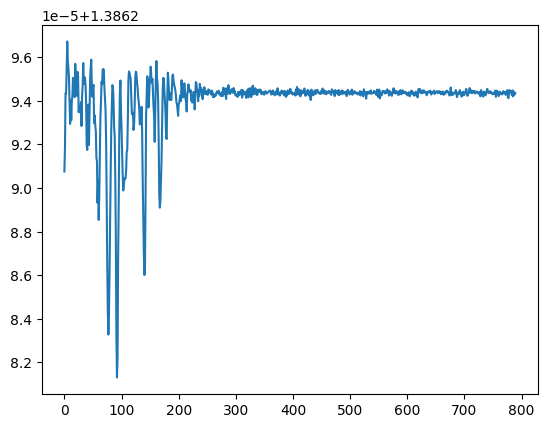

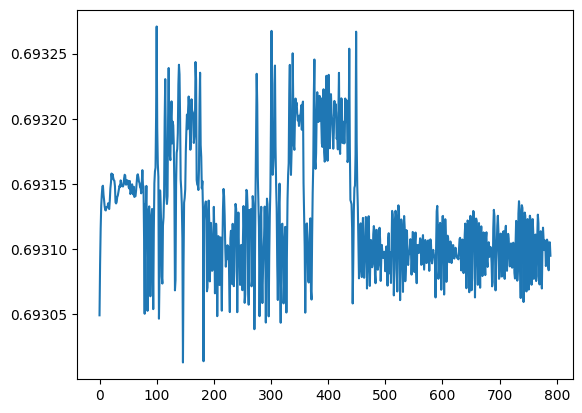

In [16]:
plt.plot(generator_losses[10:])
plt.show()
plt.plot(discriminator_losses[10:])
plt.show()

# Generation

## Generate random history

In [26]:
from gan_train_loop import load_gan

generator = Generator().to(DEVICE)
load_gan('LSTM', generator, epoch=800)

Load 800 epoch checkpoint


In [27]:
Generator()

Generator(
  (lstm): LSTM(1260, 100, num_layers=2, batch_first=True)
  (linear): Linear(in_features=100, out_features=630, bias=True)
)

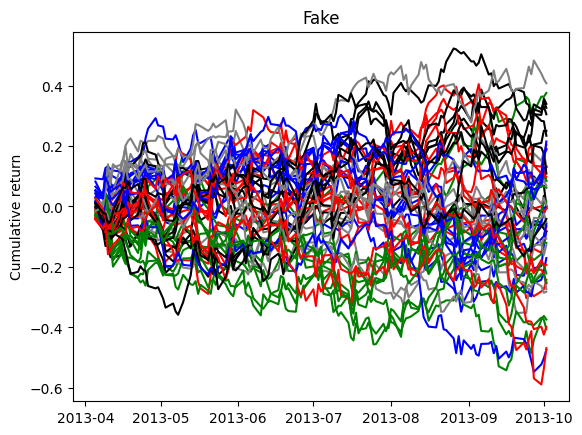

In [28]:
from gan_train_loop_LSTM import plot_gan, generate_samples


for i in range(10):
    
    gen = generate_samples(generator, dataloader.dataset.assets)
    gen = gen.set_index(df_returns_real.index[:WINDOW_SIZE]).cumsum()
    for asset, color in zip(dataloader.dataset.assets, ['green', 'grey', 'blue', 'red', 'black']):
        # if color == 'green':
        plt.plot(gen[asset], color=color)
        plt.title('Fake')
        plt.ylabel('Cumulative return')



Fake std: [0.02903855 0.02705567 0.03119148 0.02749839 0.0277414 ].
Real std: [0.01934618 0.02320357 0.02170969 0.02256658 0.01871406]
Fake correlation: -0.01482523500199224. Real correlation: 0.9185647795211369


C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
C:\Users\an.v.potapov\Desktop\учеба\ФТИАД\курсач\mometum_gan\library\gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


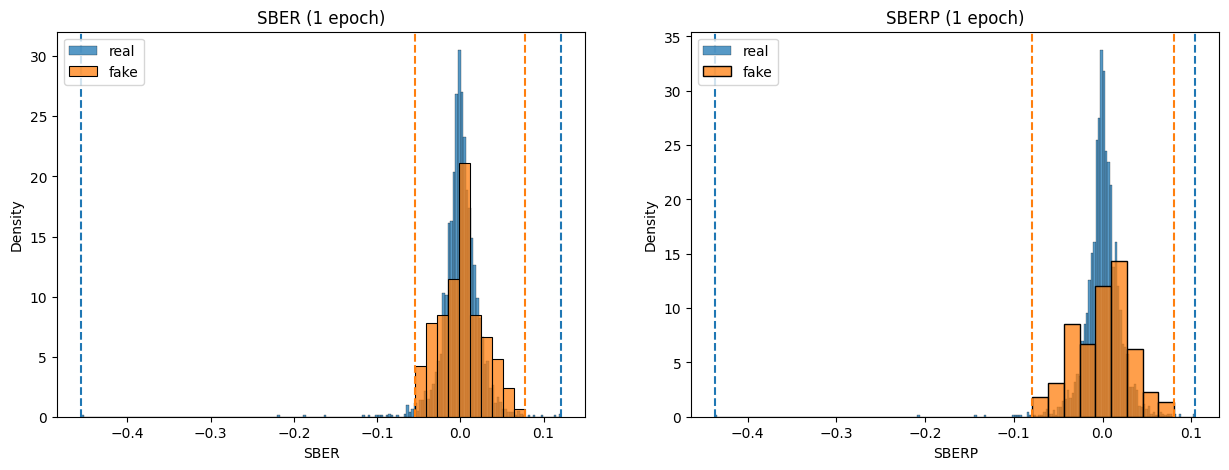

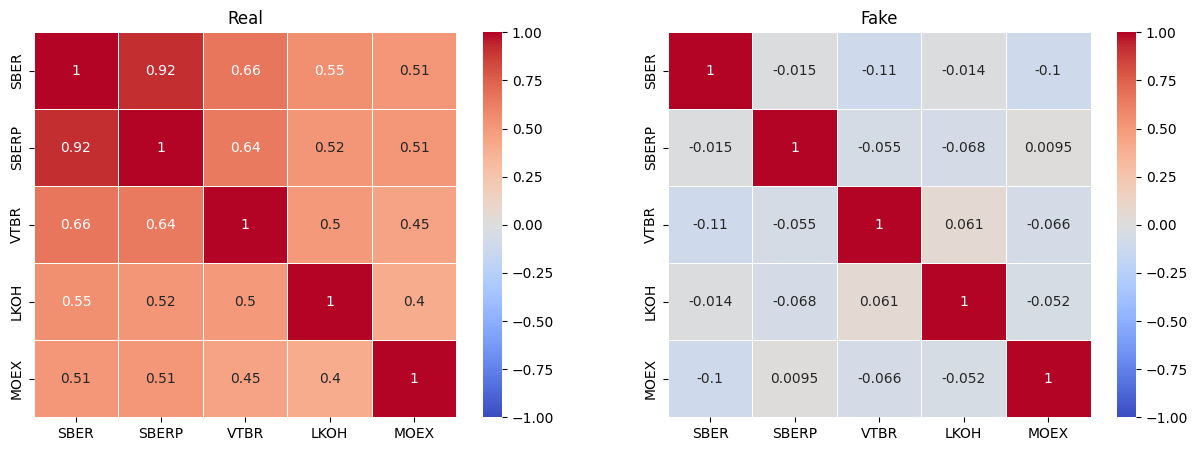

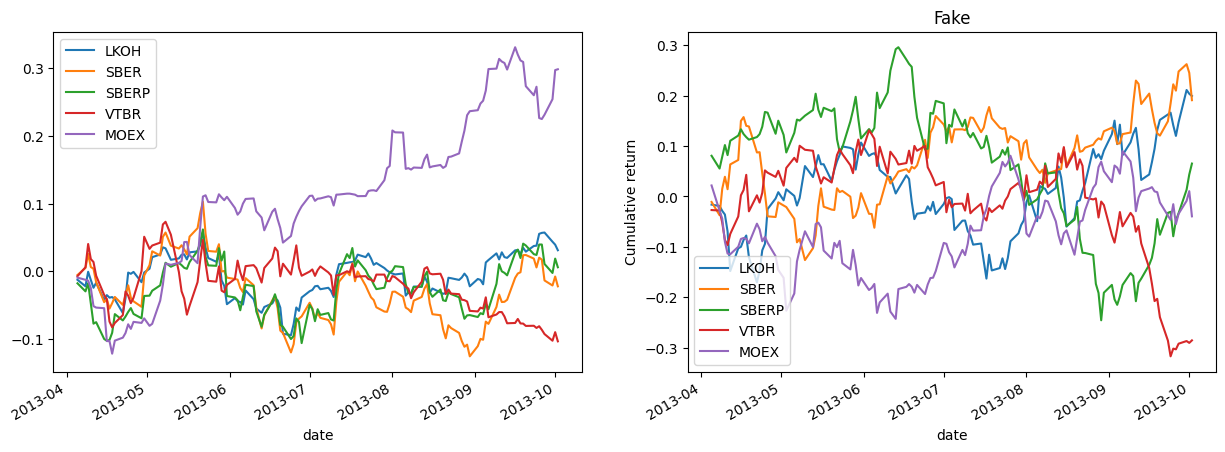

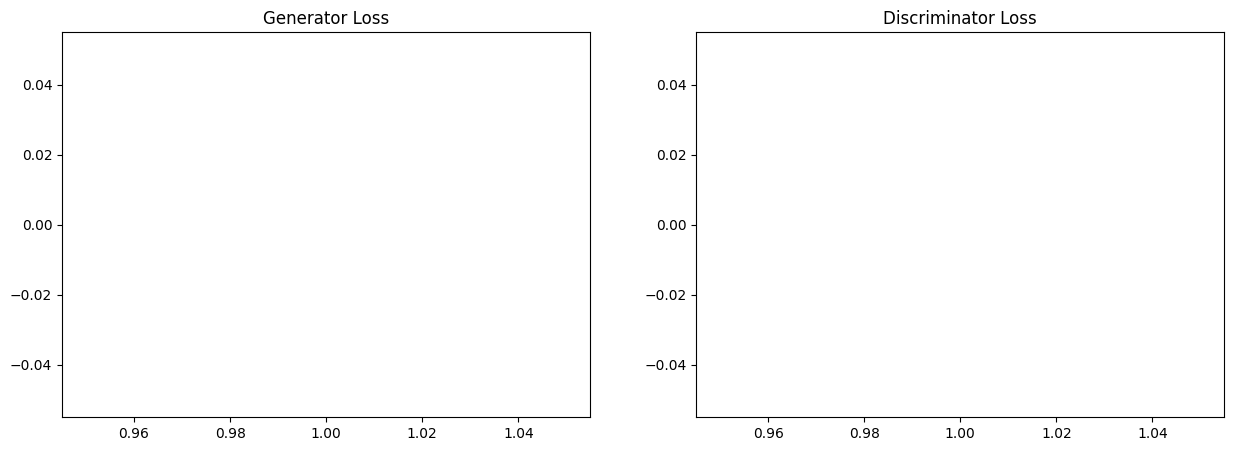

In [10]:
from gan_train_loop_LSTM import plot_gan

plot_gan(generator, df_returns_real.columns, [0], [0], 1,  df_returns_real)

In [18]:
from generation_LSTM import generate_fake_returns
df_returns_fake = generate_fake_returns(generator, df_returns_real, seed=0)

dfs.shape = torch.Size([2451, 5, 126])
result.shape = (5, 308826)
shape after merg (2576, 5)
                LKOH      SBER     SBERP      VTBR      MOEX
date                                                        
2013-04-05 -0.041719  0.005651  0.004600 -0.025292 -0.005164
2013-04-08 -0.012646 -0.005837 -0.022602  0.003242 -0.031864
2013-04-09 -0.005959  0.017736  0.089761 -0.001798 -0.031698
2013-04-10 -0.092374  0.041542 -0.024906 -0.051016 -0.018790
2013-04-11 -0.017382 -0.026415  0.026645  0.056175  0.008211
...              ...       ...       ...       ...       ...
2023-07-17 -0.055041 -0.027668 -0.041169  0.023112  0.008114
2023-07-18  0.001483  0.040309 -0.058217 -0.027297 -0.011836
2023-07-19  0.021019  0.045023 -0.056450  0.027726  0.002434
2023-07-20  0.034035 -0.047018 -0.002197 -0.050307  0.028940
2023-07-21  0.010814  0.027131 -0.009543 -0.003590  0.016431

[2576 rows x 5 columns]


## Plot cumulative real and fake returns

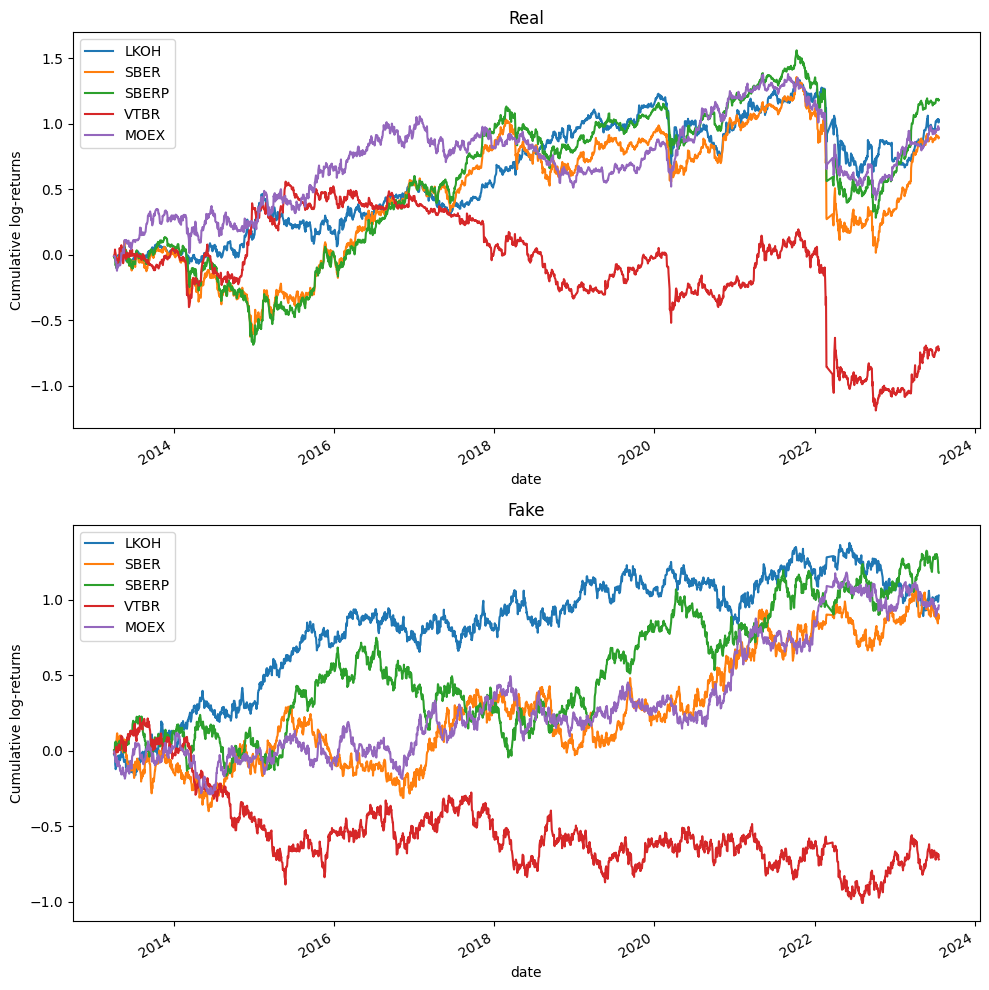

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

plt.subplot(2, 1, 1)

df_returns_real.cumsum().plot(ax=ax1)
plt.title('Real')
plt.ylabel('Cumulative log-returns')

plt.subplot(2, 1, 2)
df_returns_fake.cumsum().plot(ax=ax2)
plt.title('Fake')
plt.ylabel('Cumulative log-returns')
plt.tight_layout()

plt.show()

## Plot correlation matrix for real and fake returns

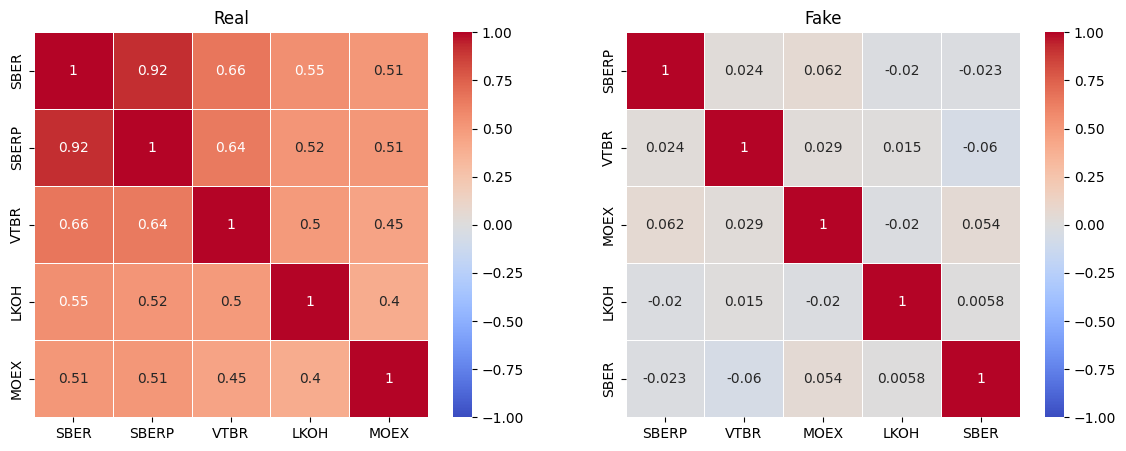

In [20]:
from correlations import plot_correlation_matrix

plt.subplots(1, 2, figsize=(14, 5))

plt.subplot(1, 2, 1)
plot_correlation_matrix(df_returns_real.corr())
plt.title('Real')

plt.subplot(1, 2, 2)
plot_correlation_matrix(df_returns_fake.corr())
plt.title('Fake')

plt.show()

# Plot returns distribution

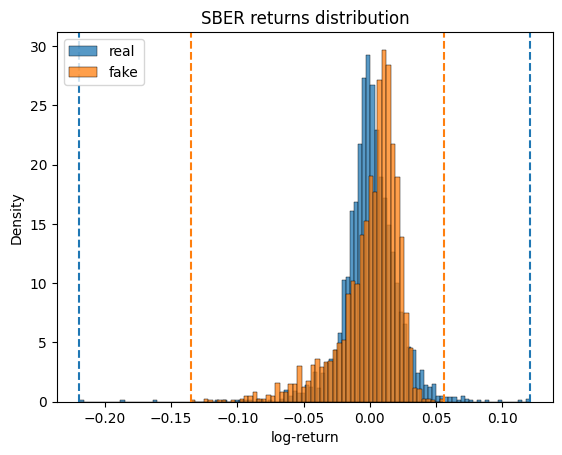

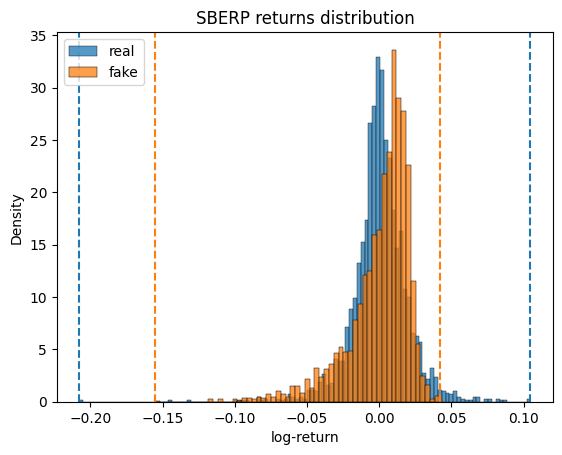

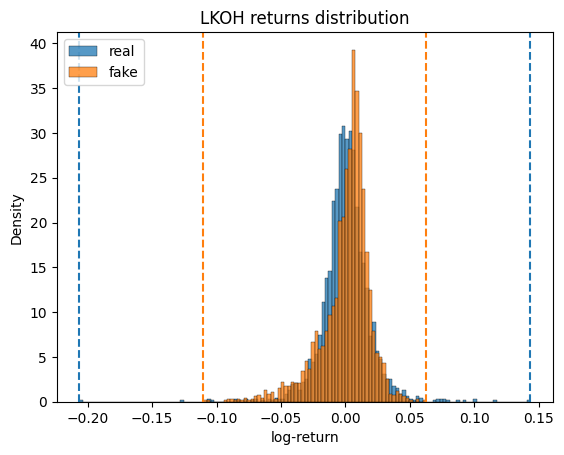

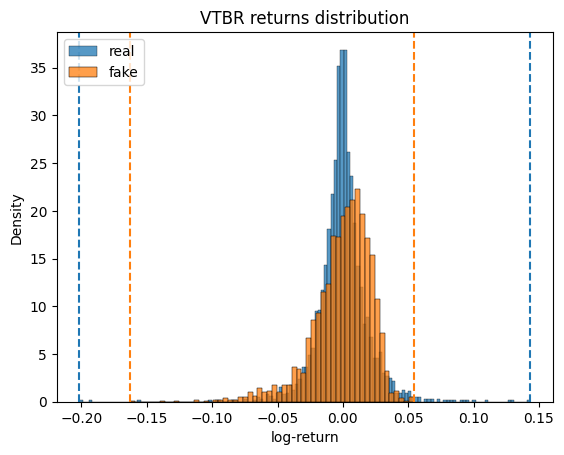

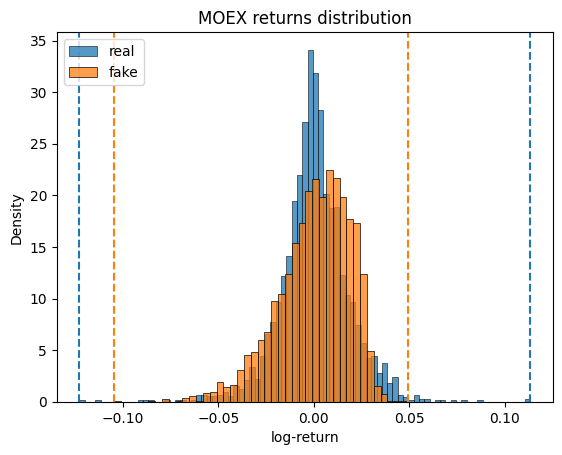

In [16]:
tmp_df_returns_real = df_returns_real[df_returns_real.sum(axis=1) != df_returns_real.sum(axis=1).min()]

for col in df_returns_real.columns:
    # Plot returns distributions
    sns.histplot(tmp_df_returns_real[col], stat='density', label='real')
    sns.histplot(df_returns_fake[col], stat='density', label='fake')

    # Plot real returns bounds
    plt.axvline(tmp_df_returns_real[col].min(), linestyle='dashed', color='C0')
    plt.axvline(tmp_df_returns_real[col].max(), linestyle='dashed', color='C0')

    # Plot fake returns bounds
    plt.axvline(df_returns_fake[col].min(), linestyle='dashed', color='C1')
    plt.axvline(df_returns_fake[col].max(), linestyle='dashed', color='C1')

    plt.xlabel('log-return')
    plt.legend(loc='upper left')
    plt.title(f'{col} returns distribution')
    plt.show()